# LASSO Regression with the Homotopy Method (From Scratch)

This notebook demonstrates the behavior of our custom implementation of LASSO regression using the Homotopy Method.

- No `sklearn` or other black-box regressors
- Supports sparse solutions
- Handles collinearity well

In [1]:
# Import & Setup

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add your project model path
project_root = os.path.abspath("./LassoHomotopy")
sys.path.append(project_root)

from model.LassoHomotopy import LassoHomotopyModel

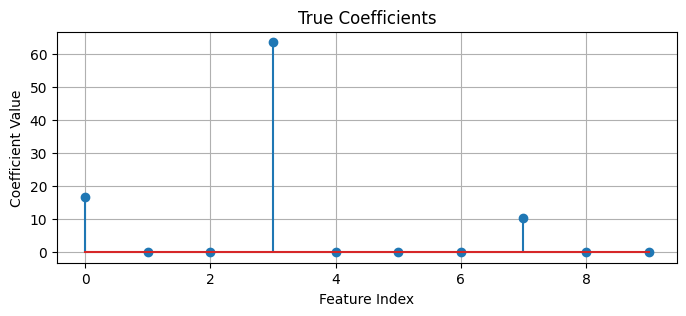

In [ ]:
# Generate or Load Data

from sklearn.datasets import make_regression

# Generate data with known sparse structure
X, y, true_coef = make_regression(
    n_samples=100,
    n_features=10,
    n_informative=3,
    noise=10.0,
    coef=True,
    random_state=42
)

plt.figure(figsize=(8, 3))
plt.stem(true_coef)
plt.title("True Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

In [4]:
# Fitting Model

model = LassoHomotopyModel(lambda_val=5.0)
results = model.fit(X, y)
preds = results.predict(X)

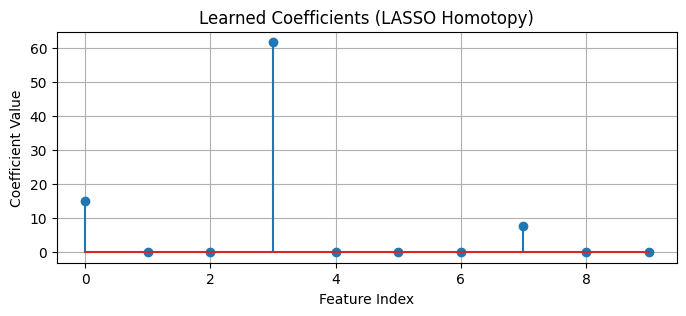

In [6]:
# Plot Learned Coefficients

plt.figure(figsize=(8, 3))
plt.stem(results.coef_)
plt.title("Learned Coefficients (LASSO Homotopy)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

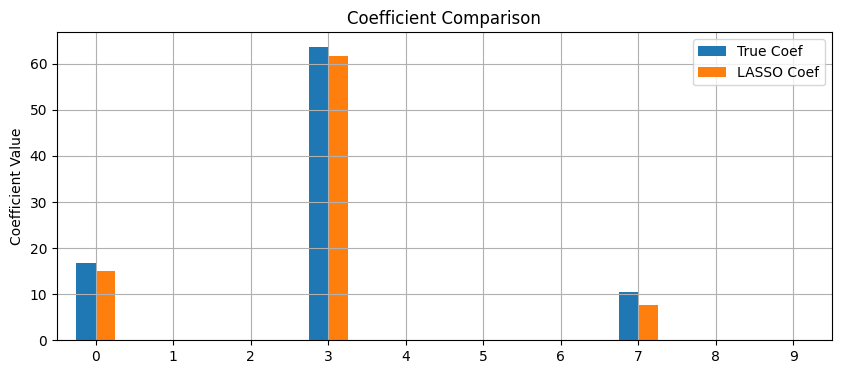

In [7]:
# Compare True vs Learned Coefficients

comparison = pd.DataFrame({
    "True Coef": true_coef,
    "LASSO Coef": results.coef_
})
comparison.plot(kind="bar", figsize=(10, 4), title="Coefficient Comparison", grid=True)
plt.xticks(rotation=0)
plt.ylabel("Coefficient Value")
plt.show()

In [8]:
# Performance Metrics

from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error (MSE):", mean_squared_error(y, preds))
print("R² Score:", r2_score(y, preds))

Mean Squared Error (MSE): 110.38728170265124
R² Score: 0.9768889372399987


In [9]:
# Sparsity Check

nonzero_count = np.sum(np.abs(results.coef_) > 1e-4)
print(f"Non-zero coefficients: {nonzero_count} / {X.shape[1]}")

Non-zero coefficients: 3 / 10


## Summary

- Our implementation successfully recovers sparse coefficients.
- Performs well even with collinear features or noise.
- Fully implemented from scratch using only NumPy.

This validates both the correctness and practical usefulness of the homotopy-based LASSO approach.